In [174]:
import pandas as pd

import numpy as np
from numpy import array

import cv2 as cv2

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


import matplotlib.pyplot as plt
import matplotlib.image as im


In [117]:
x = pd.read_csv('./50signDataset/GT-00002.csv', sep='\;')
y = pd.read_csv('./30signDataset/GT-00001.csv', sep=';')
w = pd.read_csv('./60signDataset/GT-00003.csv', sep=';')
z = pd.read_csv('./70signDataset/GT-00004.csv', sep=';')
v = pd.read_csv('./80signDataset/GT-00005.csv', sep=';')

<ipython-input-117-3bb5732b35fc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  x = pd.read_csv('./50signDataset/GT-00002.csv', sep='\;')


In [124]:
nameOne = y.Filename
is30Sign = y.ClassId

nameTwo = x.Filename
is50Sign = x.ClassId

nameThree = w.Filename
is60Sign = w.ClassId

nameFour = z.Filename
is70Sign = z.ClassId

nameFive = v.Filename
is80Sign = v.ClassId

In [125]:
tabIThirty = np.zeros([2220,55*57])
tabClassIdThirty = np.zeros([2220,1])

for i in range(1,2220) :
    I=im.imread("30signDataset/" + nameOne[i])
    tabClassIdThirty[i] = is30Sign[i]
    
    IgrayOne=cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    IgrayOne=cv2.resize(IgrayOne,(57,55),interpolation = cv2.INTER_AREA)

    tabIThirty[i,:] = IgrayOne.reshape(IgrayOne.shape[0]*IgrayOne.shape[1])

In [134]:
tabIFifty = np.zeros([2220,55*57])
tabClassIdFifty= np.zeros([2220,1])

for i in range(1,2220) :
    I=im.imread("50signDataset/" + nameTwo[i])
    tabClassIdFifty[i] = is50Sign[i]
    
    IgrayTwo=cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    IgrayTwo=cv2.resize(IgrayTwo,(57,55),interpolation = cv2.INTER_AREA)

    tabIFifty[i,:] = IgrayTwo.reshape(IgrayTwo.shape[0]*IgrayTwo.shape[1])
    

In [135]:
tabISixty = np.zeros([1410,55*57])
tabClassIdSixty= np.zeros([1410,1])

for i in range(1,1410) :
    M=im.imread("60signDataset/" + nameThree[i])
    tabClassIdSixty[i] = is60Sign[i]
    
    IgrayThree=cv2.cvtColor(M, cv2.COLOR_BGR2GRAY)
    IgrayThree=cv2.resize(IgrayThree,(57,55),interpolation = cv2.INTER_AREA)

    tabISixty[i,:] = IgrayThree.reshape(IgrayThree.shape[0]*IgrayThree.shape[1])

In [137]:
tabISeventy = np.zeros([1410,55*57])
tabClassIdSeventy= np.zeros([1410,1])

for i in range(1,1410) :
    N=im.imread("70signDataset/" + nameFour[i])
    tabClassIdSeventy[i] = is70Sign[i]
    
    IgrayFour=cv2.cvtColor(N, cv2.COLOR_BGR2GRAY)
    IgrayFour=cv2.resize(IgrayFour,(57,55),interpolation = cv2.INTER_AREA)

    tabISeventy[i,:] = IgrayFour.reshape(IgrayFour.shape[0]*IgrayFour.shape[1])

In [139]:
tabIEighty = np.zeros([1860,55*57])
tabClassIdEigthy= np.zeros([1860,1])

for i in range(1,1860) :
    O=im.imread("80signDataset/" + nameFive[i])
    tabClassIdEigthy[i] = is80Sign[i]
    
    IgrayFive=cv2.cvtColor(O, cv2.COLOR_BGR2GRAY)
    IgrayFive=cv2.resize(IgrayFive,(57,55),interpolation = cv2.INTER_AREA)

    tabIEighty[i,:] = IgrayFive.reshape(IgrayFive.shape[0]*IgrayFive.shape[1])

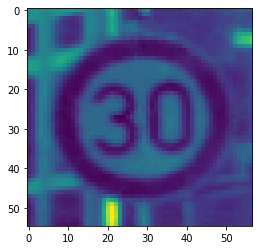

In [140]:
K=tabIThirty[1,:].reshape([55,57])

L=tabIFifty[1,:].reshape([55,57])

M=tabISixty[1,:].reshape([55,57])

N=tabIFifty[1,:].reshape([55,57])

O=tabISixty[1,:].reshape([55,57])

plt.imshow(K)

In [152]:
final30SignTab = pd.DataFrame(tabIThirty)
tabClassIdThirty = pd.DataFrame(tabClassIdThirty)

final50SignTab = pd.DataFrame(tabIFifty)
tabClassIdFifty = pd.DataFrame(tabClassIdFifty)

final60SignTab = pd.DataFrame(tabISixty)
tabClassIdSixty = pd.DataFrame(tabClassIdSixty)

final70SignTab = pd.DataFrame(tabISeventy)
tabClassIdSeventy = pd.DataFrame(tabClassIdSeventy)

final80SignTab = pd.DataFrame(tabIEighty)
tabClassIdEigthy = pd.DataFrame(tabClassIdEigthy)

finalClassIdTab = pd.concat([tabClassIdThirty,tabClassIdFifty,tabClassIdSixty,tabClassIdSeventy,tabClassIdEigthy])

In [153]:
finalTotalTab = pd.concat([final50SignTab,final30SignTab, final60SignTab,final70SignTab,final80SignTab], ignore_index=True)

In [154]:
xtrain, xtest, ytrain, ytest = train_test_split(finalTotalTab, finalClassIdTab, test_size=0.35, random_state=42)

In [155]:
print('pourcentage:' ,xtrain.shape[0]/finalTotalTab.shape[0])

pourcentage: 0.65


In [156]:
# Classification par arbre de décision
Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=20)
clf = Arbre_decision.fit(xtrain, ytrain)

ypredit = clf.predict(xtest)
accuracy_score(ytest, ypredit)

0.7760025062656641

In [157]:
print(metrics.confusion_matrix(ytest, ypredit))

[[616  57  33  37  63]
 [ 74 640   7  26  31]
 [ 28   5 395   8  62]
 [ 25  50  10 379  15]
 [ 57  42  56  29 447]]


In [158]:
#Classification par voisin le plus proche

KNN = KNeighborsClassifier()
clf = KNN .fit(xtrain, ytrain)

ypredit = clf.predict(xtest)
accuracy_score(ytest, ypredit)

<ipython-input-158-5a8a923f6bff>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf = KNN .fit(xtrain, ytrain)


0.8336466165413534

In [160]:
print(metrics.confusion_matrix(ytest, ypredit))

[[669  51  21  16  49]
 [ 53 683  12  10  20]
 [ 20  21 375  19  63]
 [ 21  23  22 394  19]
 [ 23  14  34  20 540]]


In [169]:
clf = svm.SVC(gamma=0.001)

clf.fit(xtrain,ytrain)
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [170]:
ypredit = clf.predict(xtest)
accuracy_score(ytest, ypredit)

0.24404761904761904

In [171]:
ypredit = clf.predict(xtest) 
print(metrics.confusion_matrix(ytest, ypredit))

[[  1 805   0   0   0]
 [  0 778   0   0   0]
 [  0 498   0   0   0]
 [  0 479   0   0   0]
 [  0 631   0   0   0]]


In [ ]:
gpc = GaussianProcessClassifier(1.0 * RBF(1.0),random_state=0).fit(xtrain, ytrain)

In [ ]:
ypredit = clf.predict(xtest)
accuracy_score(ytest, ypredit)